## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Conv1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
#git test from macbook 2

ModuleNotFoundError: No module named 'pandas'

## Load Data

In [ ]:
data = pd.read_csv('train.csv')
data.head(20)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5
1,6.6,0.580,0.02,2.4,0.069,19.0,40.0,0.99387,3.38,0.66,12.6,6
2,9.2,0.755,0.18,2.2,0.148,10.0,103.0,0.99690,2.87,1.36,10.2,6
3,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0,5
4,10.6,0.360,0.57,2.3,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
5,12.0,0.450,0.55,2.0,0.073,25.0,49.0,0.99970,3.10,0.76,10.3,6
6,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
7,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
8,7.8,0.560,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.5,5
9,6.6,0.500,0.01,1.5,0.060,17.0,26.0,0.99520,3.40,0.58,9.8,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1000 non-null   float64
 1   volatile.acidity      1000 non-null   float64
 2   citric.acid           1000 non-null   float64
 3   residual.sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free.sulfur.dioxide   1000 non-null   float64
 6   total.sulfur.dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,1000.0,8.301300,1.713092,4.70000,7.100000,7.90000,9.200000,15.9000
volatile.acidity,1000.0,0.523645,0.172574,0.12000,0.395000,0.51000,0.630000,1.5800
citric.acid,1000.0,0.268310,0.194616,0.00000,0.090000,0.25000,0.420000,1.0000
residual.sugar,1000.0,2.552300,1.429940,0.90000,1.900000,2.20000,2.600000,15.5000
chlorides,1000.0,0.087091,0.048161,0.01200,0.070000,0.07900,0.090000,0.6110
free.sulfur.dioxide,1000.0,15.862500,10.255048,1.00000,8.000000,14.00000,21.000000,72.0000
total.sulfur.dioxide,1000.0,46.255500,32.748579,6.00000,23.000000,38.00000,60.000000,289.0000
density,1000.0,0.996713,0.001880,0.99007,0.995567,0.99673,0.997833,1.0032
pH,1000.0,3.306920,0.151222,2.74000,3.210000,3.31000,3.400000,4.0100
sulphates,1000.0,0.654180,0.168285,0.33000,0.550000,0.62000,0.720000,2.0000


## Data Cleaning

### Missing values

In [ ]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


In [ ]:

total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()
print((total_missing / total_cells) * 100)

0.0


### Distribution of data

In [ ]:
# columns = [
#     'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
#     'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
#     'pH', 'sulphates', 'alcohol'
# ]

# plt.figure(figsize=(20, 15))

# # 绘制散点图并添加红色矩形
# for i, column in enumerate(columns):
#     plt.subplot(3, 4, i+1)
#     plt.scatter(data.index, data[column], color='blue')
    
#     mean = data[column].mean()
#     std = data[column].std()
    
#     # 创建一个矩形，垂直方向覆盖均值±标准差，水平方向覆盖全部数据
#     rect = patches.Rectangle((0, mean - 2*std), len(data), 4 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
#     plt.gca().add_patch(rect)  # 将矩形添加到当前的Axes对象中

#     plt.title(column)
#     plt.tight_layout()

# plt.show()

fixed.acidity 删了 49 个点
volatile.acidity 删了 42 个点
citric.acid 删了 29 个点
residual.sugar 删了 40 个点
chlorides 删了 25 个点
free.sulfur.dioxide 删了 33 个点
total.sulfur.dioxide 删了 45 个点
density 删了 40 个点
pH 删了 33 个点
sulphates 删了 31 个点
alcohol 删了 26 个点
删点的总和: 393


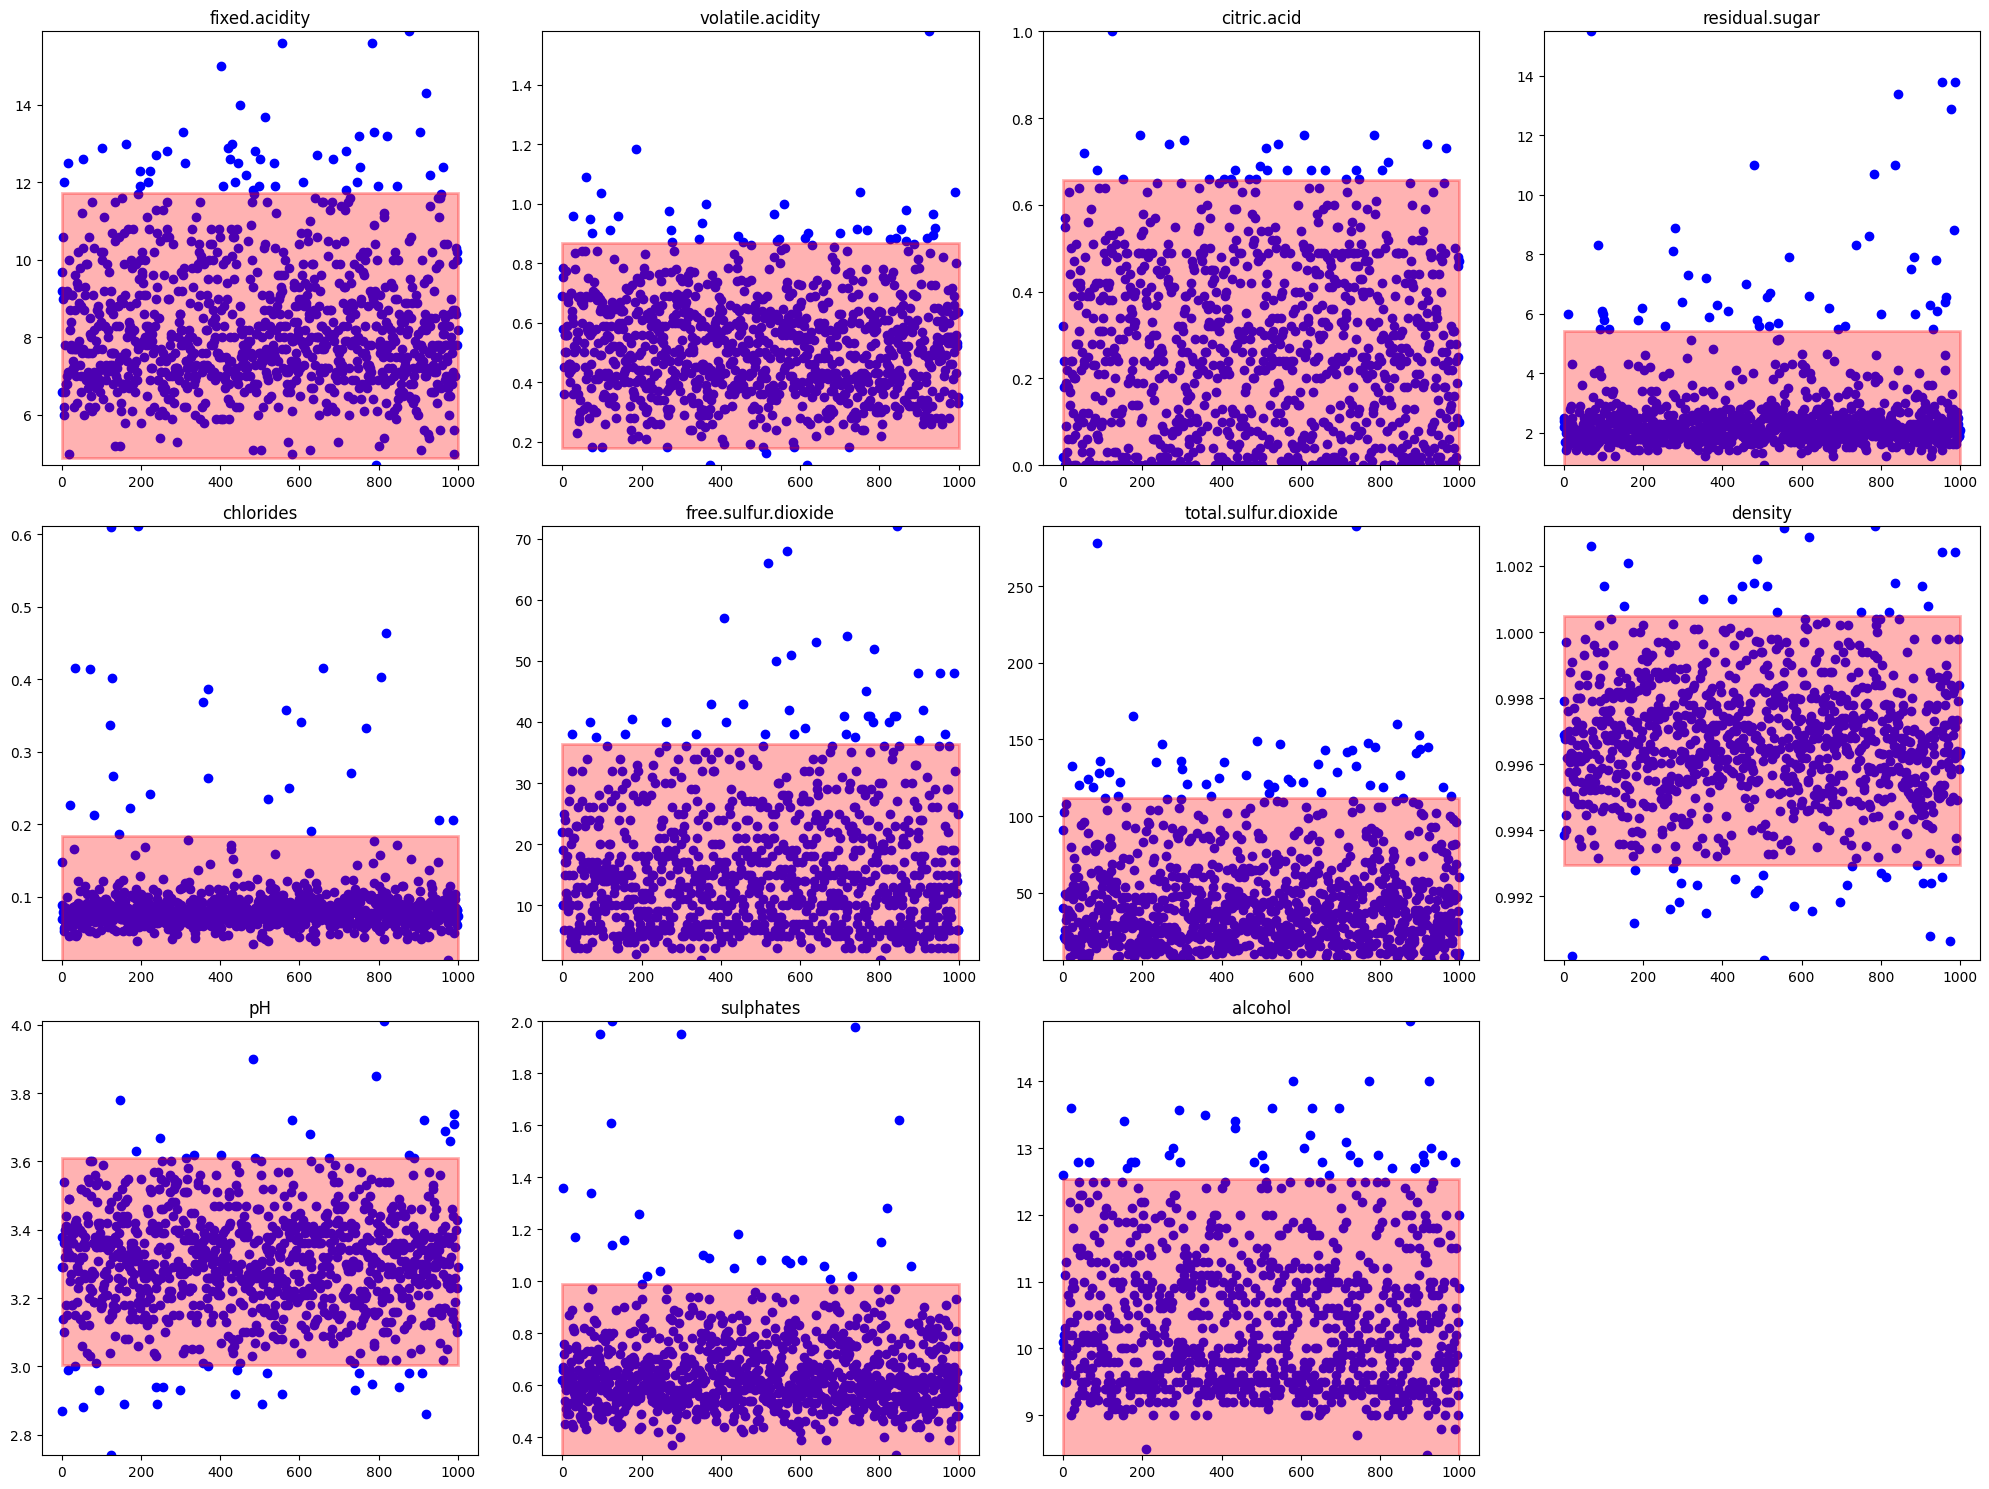

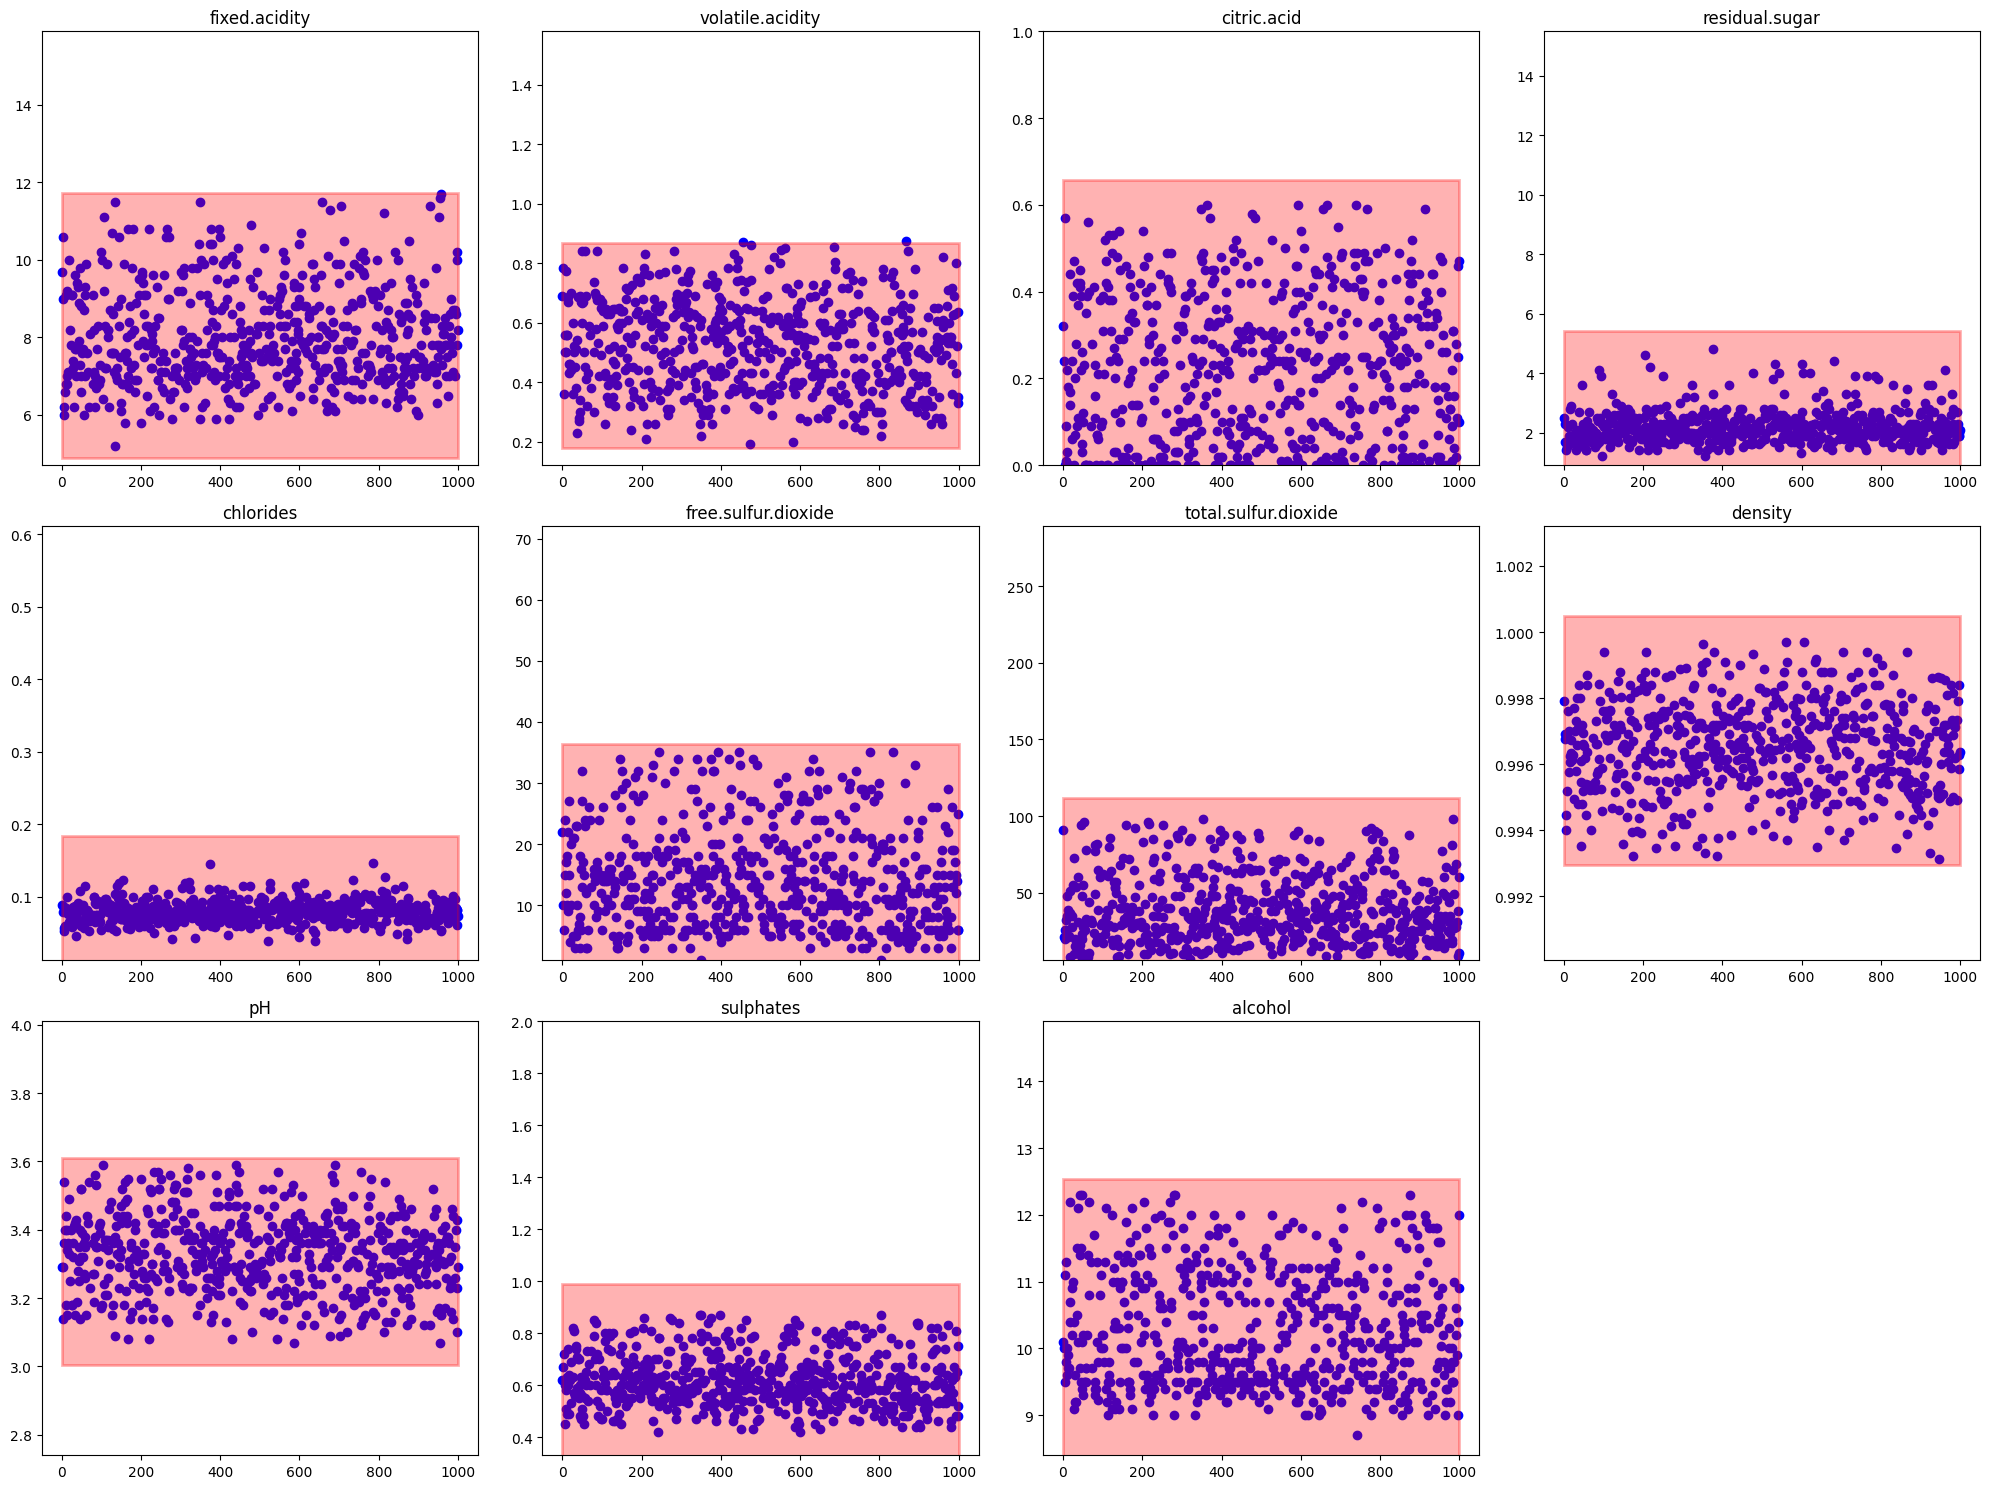

Original dataset shape: 5    434
6    399
7    119
4     29
8     11
3      8
Name: quality, dtype: int64
Resampled dataset shape: 5    271
7    271
6    271
4    271
8    271
3    271
Name: quality, dtype: int64


In [ ]:
columns = [
    'fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
    'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# 复制原始数据用于保留纵坐标scale
original_data = data.copy()
removed_points = {}
# 去除每列中均值±2倍标准差之外的数据点
for column in columns:
    mean = data[column].mean()
    std = data[column].std()
    initial_count = len(data)
    data = data[(data[column] >= mean - 2 * std) & (data[column] <= mean + 2* std)]
    final_count = len(data)
    removed_points[column] = initial_count - final_count


for column, count in removed_points.items():
    print(f"{column} 删了 {count} 个点")

# 删除点数的总和
total_removed_points = sum(removed_points.values())
print(f"删点的总和: {total_removed_points}")

# 获取每列的最大值和最小值，以便在重新绘图时设置相同的y轴scale
y_min_max = {column: (min(original_data[column].min(), data[column].min()), 
                      max(original_data[column].max(), data[column].max())) 
             for column in columns}

# 绘制初始数据的散点图并添加红色矩形
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    plt.scatter(original_data.index, original_data[column], color='blue')
    
    mean = original_data[column].mean()
    std = original_data[column].std()
    
    rect = patches.Rectangle((0, mean - 2*std), len(original_data), 4 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)
    
    plt.ylim(y_min_max[column])  # 设置y轴范围
    plt.title(column)
    plt.tight_layout()

plt.show()

# 绘制去除异常值后的散点图
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i + 1)
    plt.scatter(data.index, data[column], color='blue')
    
    mean = original_data[column].mean()
    std = original_data[column].std()
    
    rect = patches.Rectangle((0, mean - 2*std), len(original_data), 4 * std, linewidth=2, edgecolor='red', facecolor='red', alpha=0.3)
    plt.gca().add_patch(rect)
    
    plt.ylim(y_min_max[column])  # 设置y轴范围
    plt.title(column)
    plt.tight_layout()

plt.show()
# 分离去除异常值后的特征和标签
X_cleaned = data.drop(['quality'], axis=1)
y_cleaned = data['quality']

# 检查并移除包含 NaN 的行
clean_mask = ~X_cleaned.isnull().any(axis=1) & ~y_cleaned.isnull()
X_cleaned = X_cleaned[clean_mask]
y_cleaned = y_cleaned[clean_mask]

# 对处理后的数据集应用SMOTE
os = SMOTE(k_neighbors=1, random_state=42)
X_res, y_res = os.fit_resample(X_cleaned, y_cleaned)

print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_res.value_counts())

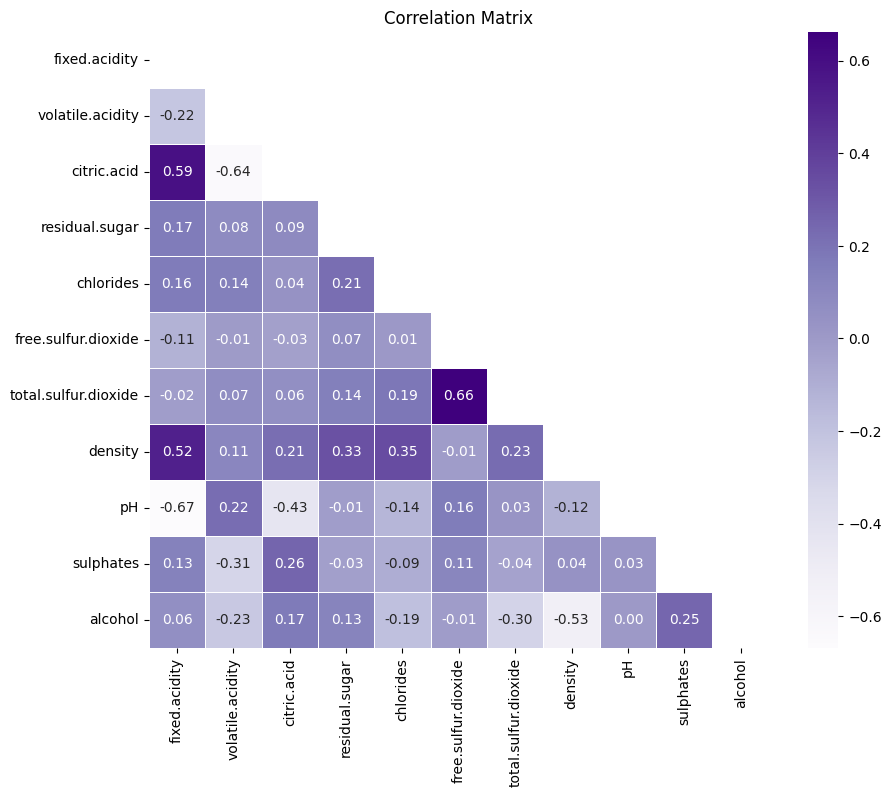

In [ ]:
corr_matrix = data[columns].corr()

# 使用 seaborn 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,  annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr_matrix))
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# sns.pairplot(data, hue='quality', corner = True, palette='Purples')

## PCA

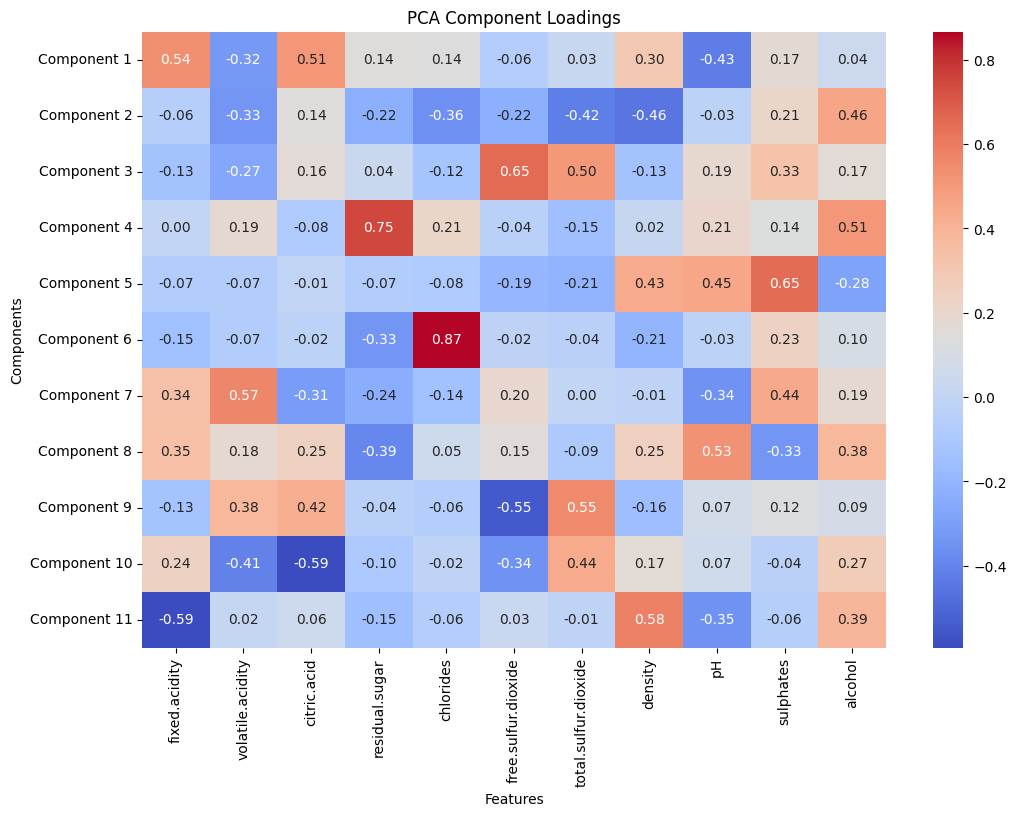

In [ ]:
features = [col for col in data.columns if col != 'quality']

# 1. 标准化数据
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# 2. 应用 PCA，不限制主成分的数目
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# 3. 特征加载矩阵的热图
loadings = pca.components_
loading_matrix = pd.DataFrame(loadings, columns=features, index=[f"Component {i+1}" for i in range(loadings.shape[0])])

# 4. 使用 seaborn 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Components')
plt.show()


Number of components to explain xx% of variance: 7


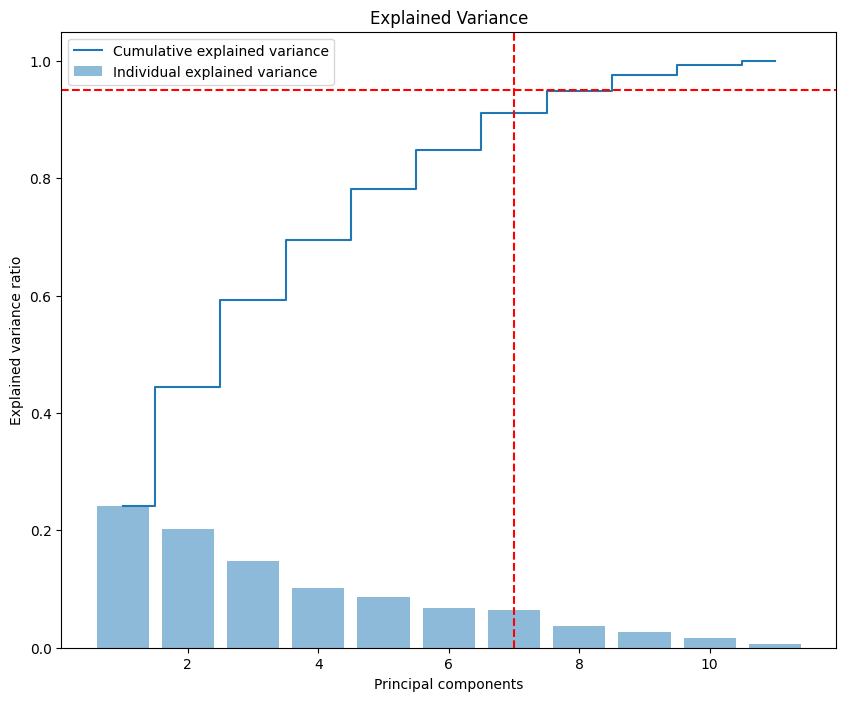

In [ ]:
# 4. 计算累计方差解释比例
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 5. 确定覆盖至少95%总方差的主成分数
n_components = np.where(cumulative_variance >= 0.9)[0][0] + 1
print(f"Number of components to explain xx% of variance: {n_components}")

# 6. 可视化方差解释比例和累计方差解释比例
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components, color='r', linestyle='--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance')
plt.legend(loc='best')
plt.show()

In [ ]:
n_components = np.where(cumulative_variance >= 0.99)[0][0] + 1
pca = PCA(n_components)  # 只保留前9个主成分
principal_components = pca.fit_transform(data_scaled)

# 3. 将主成分得分与原始的 'quality' 列合并
pca_data = pd.DataFrame(data=principal_components, columns=[f"Component {i+1}" for i in range(n_components)])
pca_data['quality'] = data['quality']  # 添加 'quality' 列

# 4. 显示新的数据集
pca_data.head(20)  # 显示前几行以检查数据
data=pca_data
data

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,quality
0,1.267577,-2.450292,1.118750,0.141006,-0.593554,-0.265828,0.956404,0.563963,1.032002,0.279472,5.0
1,0.079424,-0.060887,-1.374047,-0.415509,0.567828,0.082791,1.633321,0.574262,0.454377,-0.736666,NaN
2,3.644562,1.530884,-0.707682,0.335126,-0.062291,0.524247,0.298322,0.102173,0.291330,-0.179135,NaN
3,-2.852652,0.986146,-0.551607,-1.948117,-0.874598,-0.664762,-0.617848,-0.378416,-0.649127,-0.048401,5.0
4,-3.082605,1.906569,1.514518,-0.061115,-0.265029,-0.608652,0.121202,0.854846,-0.225306,-0.240867,7.0
...,...,...,...,...,...,...,...,...,...,...,...
602,-0.839507,-1.636618,-1.645867,0.408708,-0.096608,-0.519589,0.360178,1.147182,-0.033918,-0.166540,4.0
603,-0.054120,-1.104126,-0.217402,-0.915036,1.696223,-0.044567,-0.483604,0.355693,-0.141550,-0.187954,6.0
604,2.628006,1.344870,-1.886694,-1.032367,-1.449503,-0.035103,-0.555336,0.307779,-0.575278,-0.141099,6.0
605,1.921505,2.772860,-0.968203,0.051889,-1.253517,-0.962529,-0.274907,1.237014,-0.008075,0.292753,NaN


In [ ]:

x_res,y_res = os.fit_resample(X_cleaned,y_cleaned)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test,predictions)

/home/gavin0576/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7269938650306749

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
accuracy_score(y_test,dt.predict(x_test_std))

0.8098159509202454

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_std,y_train)
accuracy_score(y_test,dt.predict(x_test_std))

0.8098159509202454

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
rf = RandomForestClassifier(random_state=42)

# 设置K折交叉验证，这里我们使用5折
k = 15
scores = cross_val_score(rf, x_train_std, y_train, cv=k, scoring=make_scorer(accuracy_score))

# 打印每一折的准确率和平均准确率
print(f"Accuracy scores for each fold: {scores}")
print(f"Average accuracy across all folds: {scores.mean()}")

Accuracy scores for each fold: [0.91954023 0.89655172 0.81609195 0.85057471 0.90804598 0.90804598
 0.87356322 0.87356322 0.88505747 0.87356322 0.89534884 0.90697674
 0.90697674 0.90697674 0.8372093 ]
Average accuracy across all folds: 0.8838724048828298


### RandomForest

In [ ]:

# rf = RandomForestClassifier(random_state=42)
# rf.fit(x_train_std,y_train)
# accuracy_score(y_test,rf.predict(x_test_std))
# x_test_std.shape

# test_data = pd.read_csv("test.csv")  # 替换为你的测试数据路径
# test_ids = test_data['id']
# test_features = test_data.drop('id', axis=1)

# # 标准化测试数据
# test_features_std = scaler.transform(test_features)

# # 打印前 n 行
# n = 10  # 可以根据需要调整这个值
# print(pd.DataFrame(test_features_std, columns=test_features.columns).head(n))

# # 进行预测
# test_predictions = rf.predict(test_features_std)

# # 创建结果 DataFrame 并保存为 CSV 文件
# result = pd.DataFrame({'id': test_ids, 'score': test_predictions})
# result.to_csv("predictions.csv", index=False)

# print("Predictions saved to predictions.csv")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train_std,y_train)
# accuracy_score(y_test,rf.predict(x_test_std))
x_test_std.shape

test_data = pd.read_csv("test.csv")  # 替换为你的测试数据路径
test_ids = test_data['id']
test_features = test_data.drop('id', axis=1)

# 标准化测试数据
test_features_std = scaler.transform(test_features)

# 打印前 n 行
n = 10  # 可以根据需要调整这个值
print(pd.DataFrame(test_features_std, columns=test_features.columns).head(n))

# 进行预测
test_predictions = rf.predict(test_features_std)

# 创建结果 DataFrame 并保存为 CSV 文件
result = pd.DataFrame({'id': test_ids, 'score': test_predictions})
result.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       2.566759         -1.630826     2.008362       -0.577148  -0.274045   
1      -0.173117          0.375954    -1.239139       -0.392376  -0.410337   
2      -1.945979          0.610079    -1.359417       -1.131467   0.680003   
3      -0.173117          0.576632     0.384612       -1.131467   2.383660   
4       0.713313          0.643525    -0.216777        3.118306   6.199851   
5       0.068636          0.242169     0.324473       -0.946694  19.692811   
6      -0.495456          0.442847    -0.878305        4.042169   0.475564   
7       0.713313         -2.032181     1.527251       -0.761921  -0.137752   
8      -0.334287         -0.761221     0.083917       -0.761921   0.066687   
9      -0.737210          1.245559    -1.359417       -0.577148   0.066687   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0             0.298871              0.954951  1.083929 -1.4944